In [2]:
import random
import math
import statistics
import matplotlib.pyplot as plt


In [3]:
%matplotlib inline

In [4]:
#working for 1 sample, as many rounds

class Dice:

    def roll(self):
        return random.randint(1,6)
    
class Player_Base_Single_Game:
    
    def __init__(self, rounds=7):
        self.samples = 1
        self.dice = Dice()
        self.rounds = rounds
        self.score_total = 0
        
    def decision(self):
        self.game_score += self.round_score
        self.list_scores.append(self.round_score)
        print("Computer ends turn. Round Score: {}.".format(self.round_score))
        print("------------------------")
        self.counter = 1
            
    def player_turn(self):
        self.round_count = 0
        self.counter = 0
        self.roll_number = 0
        self.game_score = 0
        self.round_score = 0
        self.list_scores = []
        while self.round_count < self.rounds:
            self.round_count += 1
            print("Round #{}. Game total: {}.".format(self.round_count, self.game_score))
            self.counter = 0
            self.round_score = 0 
            while self.counter < 1:
                roll = self.dice.roll()
                print("Computer rolls a {}".format(roll))
                if roll == 1:
                    self.round_score = 0
                    self.list_scores.append(self.round_score)
                    print("End of Round #{}. Round Score: {}. Total Score: {}.".format(self.round_count, self.round_score, self.game_score))
                    print("------------------------")
                    self.counter = 1 
                else:
                    self.round_score += roll
                    self.decision()
        
        print("End of Game. Player scored {} points in {} rounds.".format(self.game_score, self.rounds))

player = Player_Base_Single_Game(3)
player.player_turn()



Round #1. Game total: 0.
Computer rolls a 5
Computer ends turn. Round Score: 5.
------------------------
Round #2. Game total: 5.
Computer rolls a 4
Computer ends turn. Round Score: 4.
------------------------
Round #3. Game total: 9.
Computer rolls a 3
Computer ends turn. Round Score: 3.
------------------------
End of Game. Player scored 12 points in 3 rounds.


In [191]:
class Player_Base_Samples:
    
    def __init__(self, samples=10, rounds=7):
        self.samples = samples
        self.dice = Dice()
        self.rounds = rounds
        self.round_score = 0
        
    def decision(self):
        self.game_score += self.round_score
        self.list_scores.append(self.round_score)
        #print("Computer ends turn. Round Score: {}.".format(self.round_score))
        #print("------------------------")
        self.counter = 1
    
    def player_turn(self):
        self.list_round_scores = []
        self.list_samples = []
        self.sample = 0
        self.list_scores = []
        for x in range(self.samples):
            self.round_count = 0
            self.game_score = 0
            self.round_score = 0
            self.roll_number = 0
            while self.round_count < self.rounds:
                self.round_count += 1
                #print("Round #{}. Game total: {}.".format(self.round_count, self.game_score))
                self.counter = 0
                self.round_score = 0 
                while self.counter < 1:
                    roll = self.dice.roll()
                    #print("Computer rolls a {}".format(roll))
                    if roll == 1:
                        self.round_score = 0
                        self.list_scores.append(self.round_score)
                        #print("End of Round #{}. Round Score: {}. Total Score: {}.".format(self.round_count, self.round_score, self.game_score))
                        #print("------------------------")
                        self.counter = 1 
                    else:
                        self.round_score += roll
                        self.roll_number += 1
                        self.decision()
            
            #print("End of Game. Player scored {} points in {} rounds.".format(self.game_score, self.round_count))
            
            self.list_samples.append(self.game_score)
            self.average = sum(self.list_samples) / len(self.list_samples)
        
        return self.list_samples   
    
    def play_game(self, samples, rounds):
        self.samples = samples
        self.rounds = rounds
        return self.player_turn()
    
player = Player_Base_Samples()
base_results = player.play_game(1000,7)
base_avg = player.average

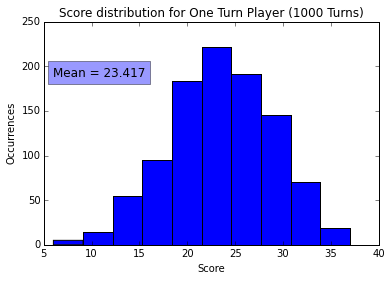

In [166]:
plt.hist(base_results, bins=10)
plt.title("Score distribution for One Turn Player (1000 Turns)")
plt.xlabel("Score")
plt.ylabel("Occurrences")
plt.text(6, 200, "Mean = {}".format(base_avg), fontsize=12,
    verticalalignment='top',bbox={'facecolor':'blue', 'alpha':0.4, 'pad':10})
plt.show()

This shows the score distribution over a seven round game for an AI who only takes one roll per turn.

In [157]:
class Player_Score_20(Player_Base_Samples):
    
    def decision(self):
        if self.round_score < 20:
            self.counter = 0
        else:
            self.game_score += self.round_score
            self.list_round_scores.append(self.round_score)
            self.round_score = 0
            self.counter = 1
    
player = Player_Score_20()
Player_Score_20_results = player.play_game(1000,7)
Player_Score_20_avg = player.average

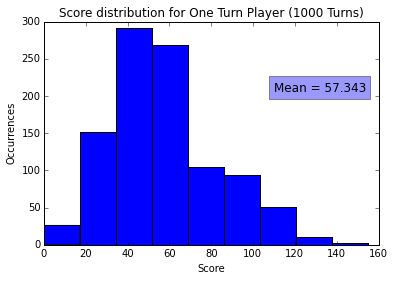

In [167]:
plt.hist(Player_Score_20_results, bins=9)
plt.title("Score distribution for One Turn Player (1000 Turns)")
plt.xlabel("Score")
plt.ylabel("Occurrences")
plt.text(110, 220, "Mean = {}".format(Player_Score_20_avg), fontsize=12,
        verticalalignment='top',bbox={'facecolor':'blue', 'alpha':0.4, 'pad':10})

plt.show()

In [168]:
class Player_Score_25(Player_Base_Samples):
    
    def decision(self):
        if self.round_score < 25:
            self.counter = 0
        else:
            self.game_score += self.round_score
            self.list_round_scores.append(self.round_score)
            self.round_score = 0
            self.counter = 1
    
player = Player_Score_25()
Player_Score_25_results = player.play_game(1000,7)
Player_Score_25_avg = player.average

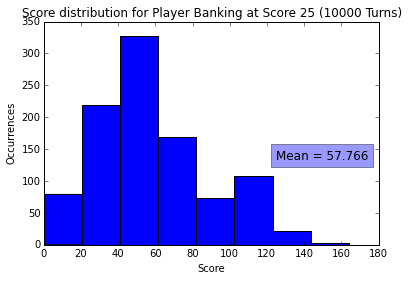

In [172]:
plt.hist(Player_Score_25_results, bins=8)
plt.title("Score distribution for Player Banking at Score 25 (10000 Turns)")
plt.xlabel("Score")
plt.ylabel("Occurrences")
plt.text(125, 150, "Mean = {}".format(Player_Score_25_avg), fontsize=12,
        verticalalignment='top',bbox={'facecolor':'blue', 'alpha':0.4, 'pad':10})

plt.show()

When having the AI end their turn after scoring 25, rather than 20, we see the score distribution shift as higher scores are possible and have a greater possibility of occuring. However, the overall 7 round average goes down slightly. 

In [173]:
class Player_Score_30(Player_Base_Samples):
    
    def decision(self):
        if self.round_score < 30:
            self.counter = 0
        else:
            self.game_score += self.round_score
            self.list_round_scores.append(self.round_score)
            self.round_score = 0
            self.counter = 1
    
player = Player_Score_30()
Player_Score_30_results = player.play_game(1000,7)
Player_Score_30_avg = player.average

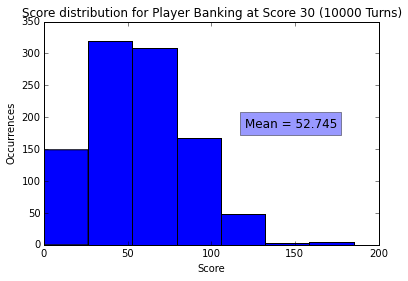

In [182]:
plt.hist(Player_Score_30_results, bins=7)
plt.title("Score distribution for Player Banking at Score 30 (10000 Turns)")
plt.xlabel("Score")
plt.ylabel("Occurrences")
plt.text(120, 200, "Mean = {}".format(Player_Score_30_avg), fontsize=12,
        verticalalignment='top',bbox={'facecolor':'blue', 'alpha':0.4, 'pad':10})
plt.show()

We see the average 7 round score continue to go down if we only allow the AI to pass their turn after scoring 30 in a round. Distribution seems relatively the same as the 25 point limit.

In [184]:
class Player_Score_15(Player_Base_Samples):
    
    def decision(self):
        if self.round_score < 15:
            self.counter = 0
        else:
            self.game_score += self.round_score
            self.list_round_scores.append(self.round_score)
            self.round_score = 0
            self.counter = 1
    
player = Player_Score_15()
Player_Score_15_results = player.play_game(1000,7)
Player_Score_15_avg = player.average

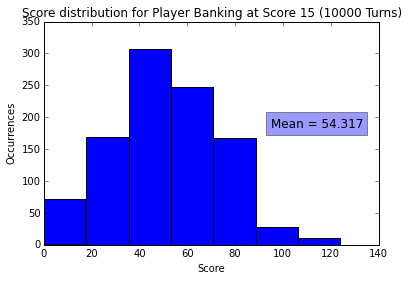

In [186]:
plt.hist(Player_Score_15_results, bins=7)
plt.title("Score distribution for Player Banking at Score 15 (10000 Turns)")
plt.xlabel("Score")
plt.ylabel("Occurrences")
plt.text(95, 200, "Mean = {}".format(Player_Score_15_avg), fontsize=12,
        verticalalignment='top',bbox={'facecolor':'blue', 'alpha':0.4, 'pad':10})

plt.show()

The average is not as high as the round limit of 20 - which seems to be optimal. The potential for high scores is also worse.

In [201]:
class Player_Rolls_5(Player_Base_Samples):
    
    def decision(self):
        if self.roll_number < 5:
            self.counter = 0
        else:
            self.game_score += self.round_score
            self.list_round_scores.append(self.round_score)
            self.round_score = 0
            self.counter = 1
            
player = Player_Rolls_5()
Player_Rolls_5_results = player.play_game(1000,7)
Player_Rolls_5_avg = player.average

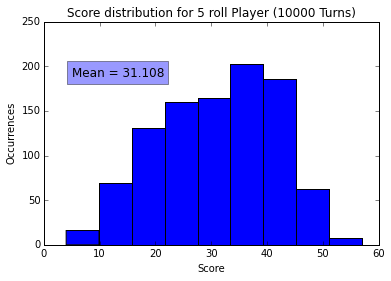

In [206]:
plt.hist(Player_Rolls_5_results, bins=9)
plt.title("Score distribution for 5 roll Player (10000 Turns)")
plt.xlabel("Score")
plt.ylabel("Occurrences")
plt.text(5, 200, "Mean = {}".format(Player_Rolls_5_avg), fontsize=12,
        verticalalignment='top',bbox={'facecolor':'blue', 'alpha':0.4, 'pad':10})
plt.show()

Now, we've completely shifted strategy and have placed a round limit on the number of rolls the AI can take. In this run, the AI has to pass after a max of five rolls, which we see results in a strong average off 31. with a normal distribution.

In [207]:
class Player_Rolls_8(Player_Base_Samples):
    
    def decision(self):
        if self.roll_number < 8:
            self.counter = 0
        else:
            self.game_score += self.round_score
            self.list_round_scores.append(self.round_score)
            self.round_score = 0
            self.counter = 1
            
player = Player_Rolls_8()
Player_Rolls_8_results = player.play_game(1000,7)
Player_Rolls_8_avg = player.average

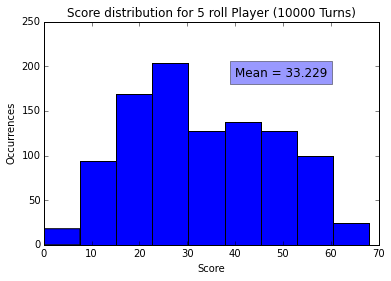

In [213]:
plt.hist(Player_Rolls_8_results, bins=9)
plt.title("Score distribution for 5 roll Player (10000 Turns)")
plt.xlabel("Score")
plt.ylabel("Occurrences")
plt.text(40, 200, "Mean = {}".format(Player_Rolls_8_avg), fontsize=12,
        verticalalignment='top',bbox={'facecolor':'blue', 'alpha':0.4, 'pad':10})

plt.show()

Interestingly, increasing this limit to 8 rolls decreases the computer's score pretty significantly. Likely, the computer is trying to stretch it's luck too thin by never banking until after roll 8. The chance of rolling a 1 within these turns is too high. However, if you are going for a max score this looks like the way to go, as there was a score in the 200 range

In [215]:
class Player_Rolls_12(Player_Base_Samples):
    
    def decision(self):
        if self.roll_number < 8:
            self.counter = 0
        else:
            self.game_score += self.round_score
            self.list_round_scores.append(self.round_score)
            self.round_score = 0
            self.counter = 1
            
player = Player_Rolls_12()
Player_Rolls_12_results = player.play_game(1000,7)
Player_Rolls_12_avg = player.average

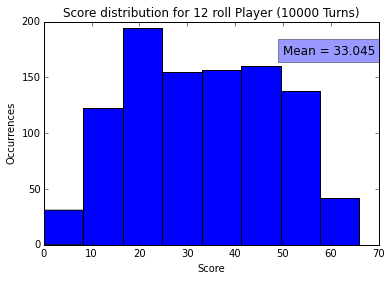

In [221]:
plt.hist(Player_Rolls_12_results, bins=8)
plt.title("Score distribution for 12 roll Player (10000 Turns)")
plt.xlabel("Score")
plt.ylabel("Occurrences")
plt.text(50, 180, "Mean = {}".format(Player_Rolls_12_avg), fontsize=12,
        verticalalignment='top',bbox={'facecolor':'blue', 'alpha':0.4, 'pad':10})

plt.show()

Very good showing when having the computer hold until 12 rounds.

In [222]:
class Player_Rolls_6(Player_Base_Samples):
    
    def decision(self):
        if self.roll_number < 8:
            self.counter = 0
        else:
            self.game_score += self.round_score
            self.list_round_scores.append(self.round_score)
            self.round_score = 0
            self.counter = 1
            
player = Player_Rolls_6()
Player_Rolls_6_results = player.play_game(1000,7)
Player_Rolls_6_avg = player.average

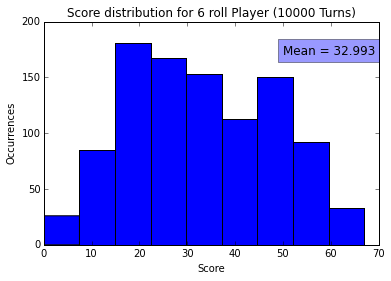

In [228]:
plt.hist(Player_Rolls_6_results, bins=9)
plt.title("Score distribution for 6 roll Player (10000 Turns)")
plt.xlabel("Score")
plt.ylabel("Occurrences")
plt.text(50, 180, "Mean = {}".format(Player_Rolls_6_avg), fontsize=12,
        verticalalignment='top',bbox={'facecolor':'blue', 'alpha':0.4, 'pad':10})
plt.show()